2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Test Accuracy: 23.33%
Precision: 10.41%
Recall: 23.33%
F1 Score: 14.18%


C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


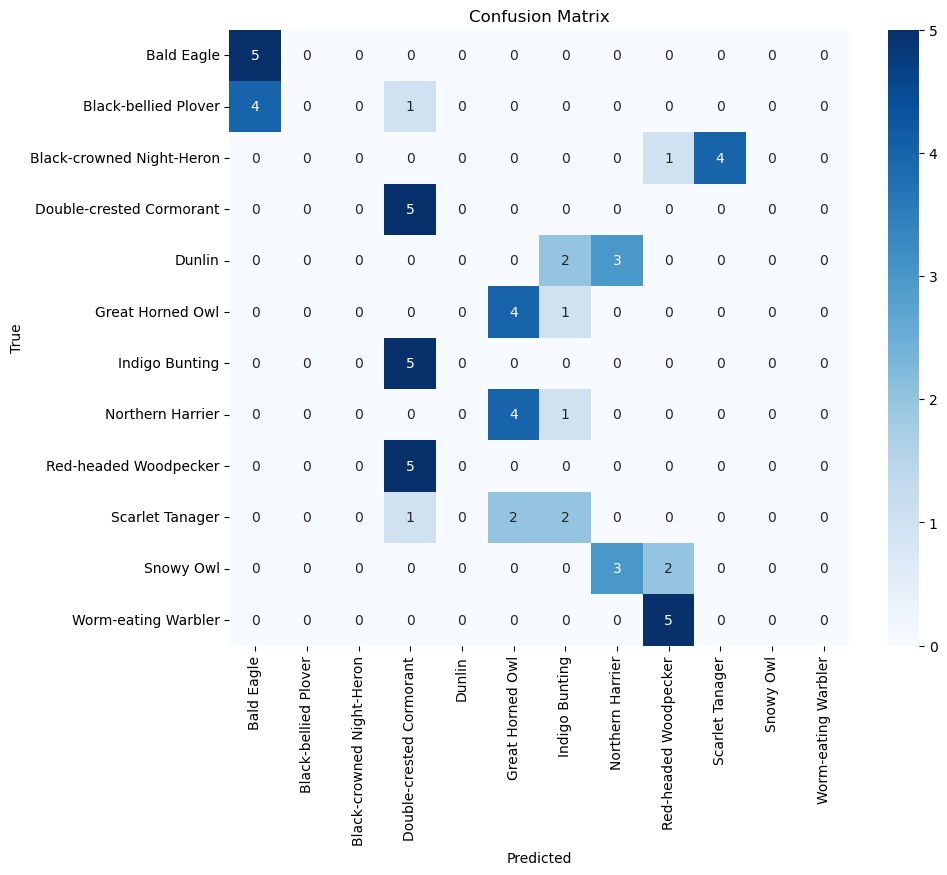

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = load_model(r'C:/Users/sahan/Downloads/nausheen/bird_classification_model.h5')

# Load the test dataset
test_df = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Encode the 'BIRD_NAME' column if available, else create a placeholder
if 'BIRD_NAME' in test_df.columns:
    label_encoder = LabelEncoder()
    test_df['BIRD_NAME'] = label_encoder.fit_transform(test_df['BIRD_NAME'])
else:
    test_df['BIRD_NAME'] = -1  # Placeholder for predictions

# Define features and target (assuming 'BIRD_NAME' column exists)
X_test = test_df.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
y_test = test_df['BIRD_NAME'] if 'BIRD_NAME' in test_df.columns else None

# Identify categorical columns
categorical_cols = X_test.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

# Convert all columns to numeric, if possible
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X_test.fillna(0, inplace=True)  # or you can use X_test.dropna()

# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Reshape data for CNN input (samples, width, height, channels)
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Make predictions
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# Decode the predicted labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Save predictions to the original test data file
test_df['PREDICTED_BIRD_NAME'] = y_pred_labels
test_df.to_csv('Birds_Test_Dataset_with_Predictions.csv', index=False)

# Calculate evaluation metrics
if y_test is not None and y_test.min() >= 0:
    y_true = y_test
    y_true_labels = label_encoder.inverse_transform(y_true)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

else:
    print("No ground truth labels available for test data.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
CNN Test Accuracy: 18.33%
CNN Precision: 9.16%
CNN Recall: 18.33%
CNN F1 Score: 11.59%


C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


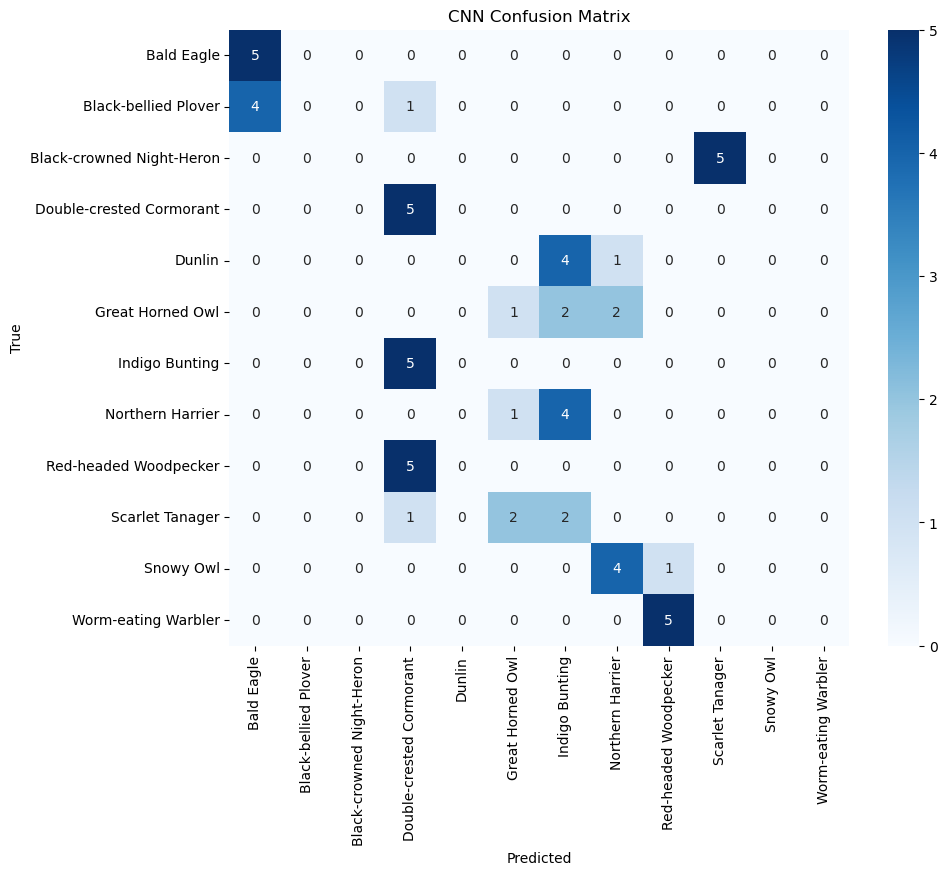

C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Test Accuracy: 58.33%
KNN Precision: 52.89%
KNN Recall: 58.33%
KNN F1 Score: 52.43%


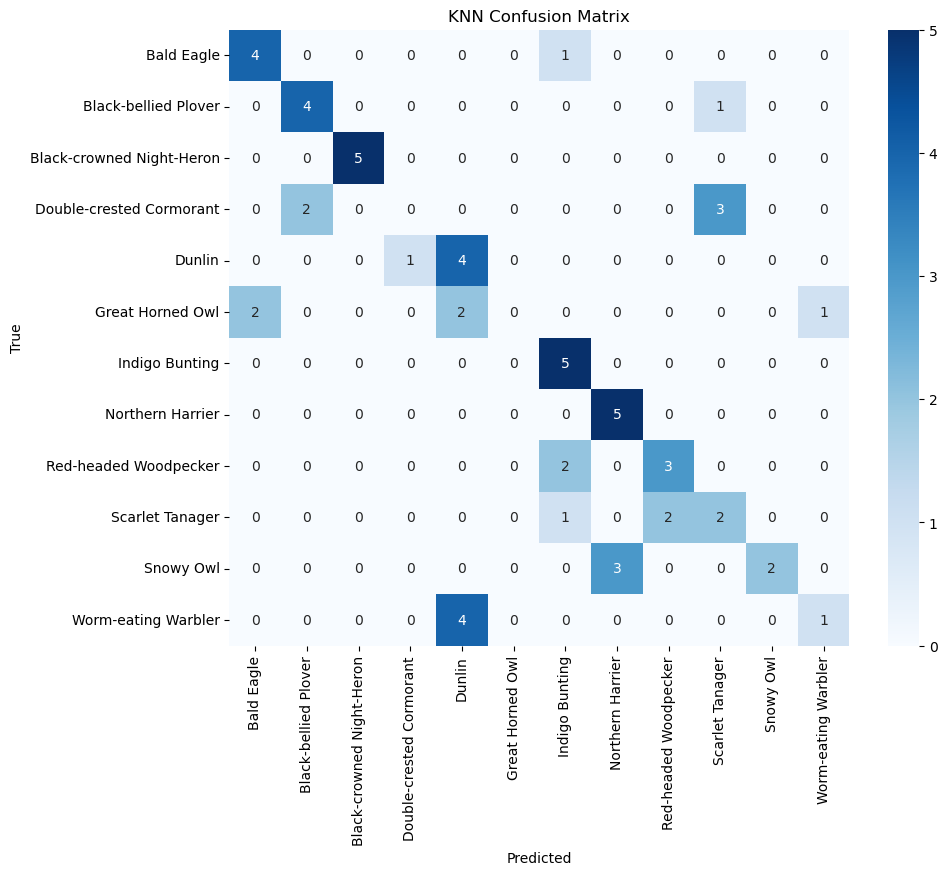

SVM Test Accuracy: 78.33%
SVM Precision: 82.40%
SVM Recall: 78.33%
SVM F1 Score: 78.56%


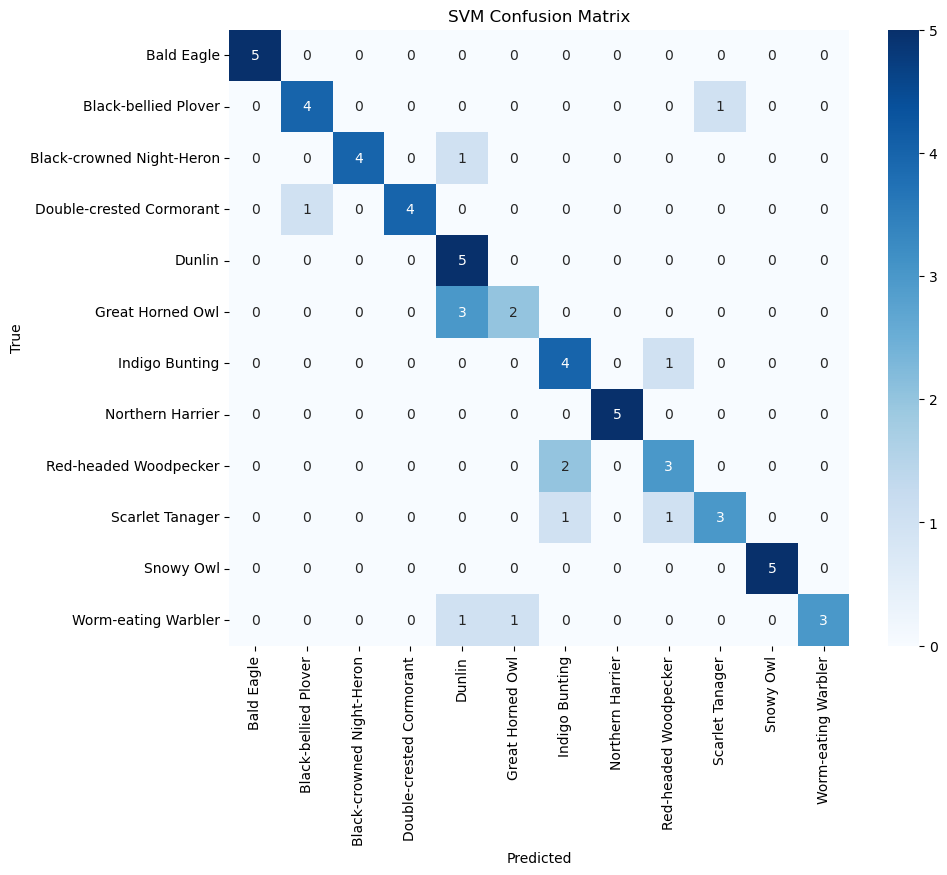

RF Test Accuracy: 98.33%
RF Precision: 98.61%
RF Recall: 98.33%
RF F1 Score: 98.32%


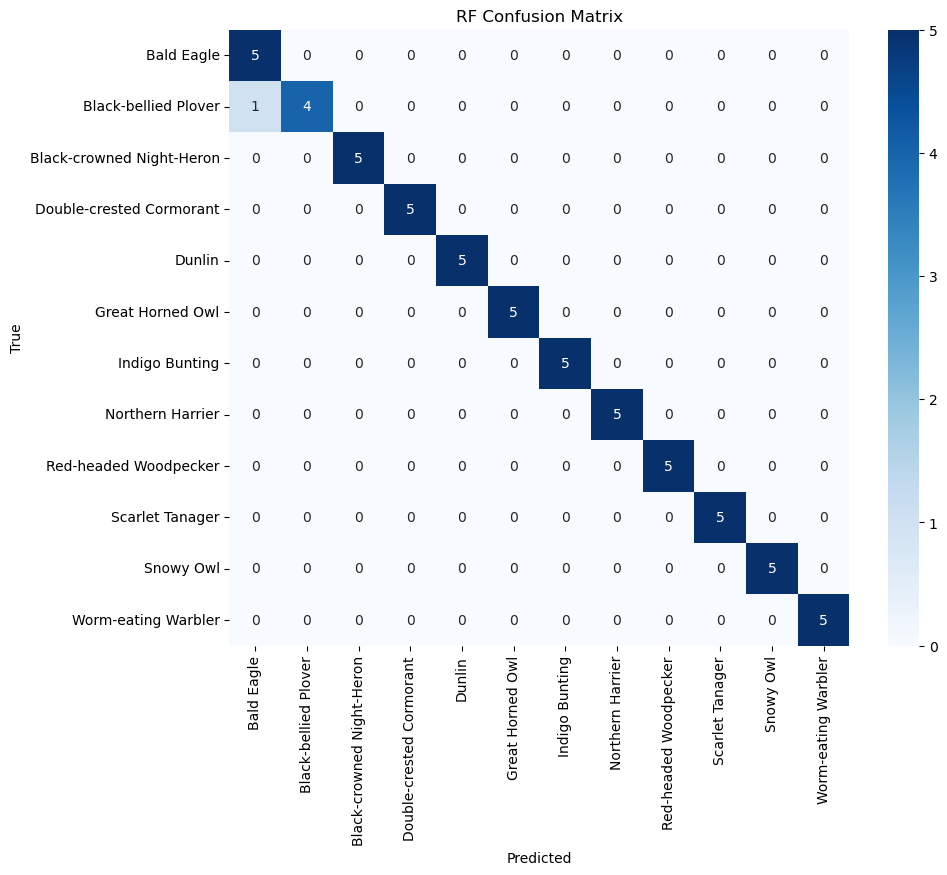

DT Test Accuracy: 95.00%
DT Precision: 95.56%
DT Recall: 95.00%
DT F1 Score: 94.97%


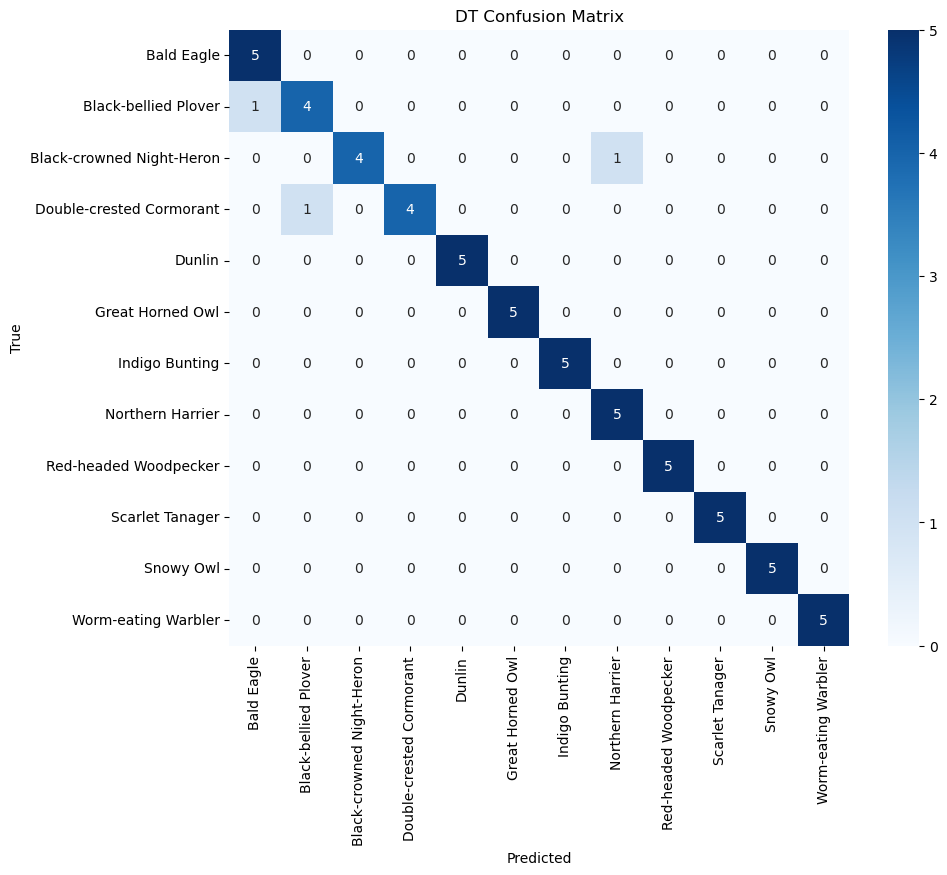


All Algorithms' Test Accuracies:
CNN: 18.33%
KNN: 58.33%
SVM: 78.33%
RF: 98.33%
DT: 95.00%


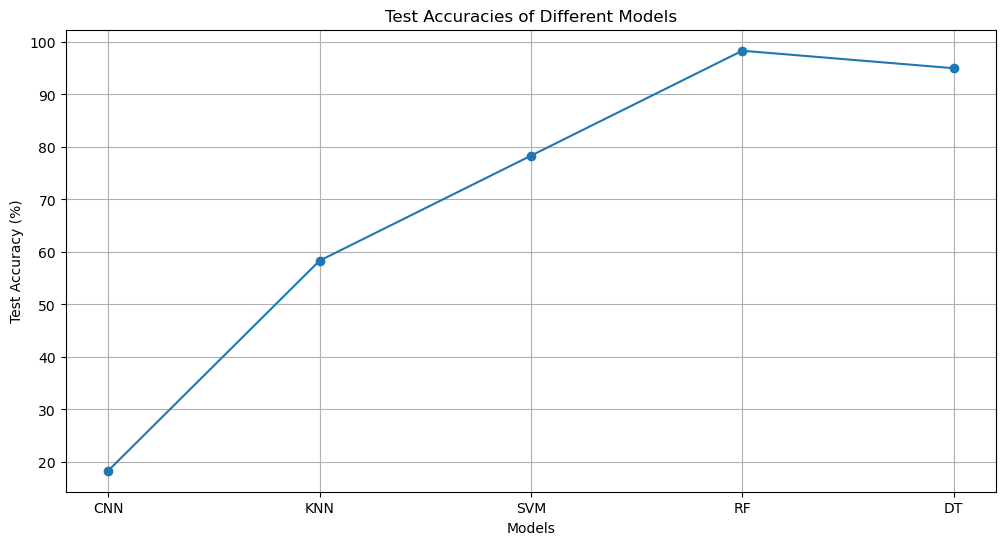

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained CNN model
cnn_model = load_model(r'C:/Users/sahan/Downloads/Adarsh/bird_classification_model.h5')

# Load the test dataset
test_df = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Encode the 'BIRD_NAME' column if available, else create a placeholder
if 'BIRD_NAME' in test_df.columns:
    label_encoder = LabelEncoder()
    test_df['BIRD_NAME'] = label_encoder.fit_transform(test_df['BIRD_NAME'])
else:
    test_df['BIRD_NAME'] = -1  # Placeholder for predictions

# Define features and target (assuming 'BIRD_NAME' column exists)
X = test_df.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
y = test_df['BIRD_NAME'] if 'BIRD_NAME' in test_df.columns else None

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert all columns to numeric, if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X.fillna(0, inplace=True)  # or you can use X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data for non-CNN models (use a small part for training if needed)
if y is not None and y.min() >= 0:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = X_scaled, X_scaled, None, None

# Prepare data for CNN model
X_test_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Function to evaluate model and print/save metrics
def evaluate_model(model, model_name, X_test, y_test, y_pred_probs):
    y_pred = np.argmax(y_pred_probs, axis=1) if model_name == 'CNN' else model.predict(X_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    
    # Save predictions to the original test data file
    test_df[f'PREDICTED_BIRD_NAME_{model_name}'] = y_pred_labels
    test_df.to_csv(f'Birds_Test_Dataset_with_Predictions_{model_name}.csv', index=False)

    # Calculate evaluation metrics
    if y_test is not None and y_test.min() >= 0:
        y_true = y_test
        y_true_labels = label_encoder.inverse_transform(y_true)

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')

        print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")
        print(f"{model_name} Precision: {precision * 100:.2f}%")
        print(f"{model_name} Recall: {recall * 100:.2f}%")
        print(f"{model_name} F1 Score: {f1 * 100:.2f}%")

        # Plot confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

        return accuracy * 100

# Evaluate and print the accuracy for each model
accuracies = {}

# 1. CNN Model
y_pred_probs_cnn = cnn_model.predict(X_test_cnn)
accuracies['CNN'] = evaluate_model(cnn_model, 'CNN', X_scaled, y, y_pred_probs_cnn)

# 2. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_probs_knn = knn.predict_proba(X_test)
accuracies['KNN'] = evaluate_model(knn, 'KNN', X_scaled, y, y_pred_probs_knn)

# 3. Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_probs_svm = svm.predict_proba(X_test)
accuracies['SVM'] = evaluate_model(svm, 'SVM', X_scaled, y, y_pred_probs_svm)

# 4. Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_probs_rf = rf.predict_proba(X_test)
accuracies['RF'] = evaluate_model(rf, 'RF', X_scaled, y, y_pred_probs_rf)

# 5. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_probs_dt = dt.predict_proba(X_test)
accuracies['DT'] = evaluate_model(dt, 'DT', X_scaled, y, y_pred_probs_dt)

# Print all the algorithms' test accuracies
print("\nAll Algorithms' Test Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}%")

# Plot testing curve
def plot_testing_curve(accuracies):
    models = list(accuracies.keys())
    acc_values = list(accuracies.values())

    plt.figure(figsize=(12, 6))
    plt.plot(models, acc_values, marker='o')
    plt.title('Test Accuracies of Different Models')
    plt.xlabel('Models')
    plt.ylabel('Test Accuracy (%)')
    plt.grid(True)
    plt.show()

# Call the function to plot testing curve
plot_testing_curve(accuracies)
